<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/23_03_2024_Binu_CNN_Model_Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install split-folders

In [7]:
import splitfolders

In [8]:
input='/content/drive/MyDrive/Binu CNN Model'
output='/content/drive/MyDrive/Binu CNN Model/split'

In [9]:
splitfolders.ratio(input,output, seed=1337, ratio=(0.8,0.1,0.1), group_prefix=None)

Copying files: 48 files [00:21,  2.23 files/s]


In [12]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Binu CNN Model/split')

['train', 'val', 'test']

In [13]:
os.listdir('/content/drive/MyDrive/Binu CNN Model/split/train')

['No contact lens', 'Contact lens']

In [14]:
os.listdir('/content/drive/MyDrive/Binu CNN Model/split/val')

['No contact lens', 'Contact lens']

In [15]:
os.listdir('/content/drive/MyDrive/Binu CNN Model/split/test')

['No contact lens', 'Contact lens']

In [51]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1/255)

trainimages= datagen.flow_from_directory('/content/drive/MyDrive/Binu CNN Model/split/train',
                                         target_size=(64,64),
                                         class_mode='binary')
validationimages= datagen.flow_from_directory('/content/drive/MyDrive/Binu CNN Model/split/val',
                                         target_size=(64,64),
                                         class_mode='binary')
testimages= datagen.flow_from_directory('/content/drive/MyDrive/Binu CNN Model/split/test',
                                         target_size=(64,64),
                                         class_mode='binary')

Found 38 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


## CNN Model Architecture

In [55]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([

                    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 12544)             0         
                                                                 
 dense_18 (Dense)            (None, 128)              

### Training the model

saving the model

In [80]:
model.fit(trainimages,
          batch_size=32,
          epochs=5,
          validation_data=validationimages)
model.save('BinuCNN_model.keras')

Epoch 1/5
2/2 [==============================] - 1s 636ms/step - loss: 3.5568e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2/5
2/2 [==============================] - 1s 539ms/step - loss: 3.3224e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 3/5
2/2 [==============================] - 1s 198ms/step - loss: 3.0349e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4/5
2/2 [==============================] - 0s 116ms/step - loss: 2.7344e-04 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 0s 367ms/step - loss: 2.3956e-04 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000


In [81]:
predictions = model.predict(testimages)
predictions

1/1 [==============================] - 0s 77ms/step


array([[3.3120466e-06],
       [5.1459097e-06],
       [8.3364612e-05],
       [9.9998635e-01],
       [9.9997568e-01],
       [6.6897196e-01]], dtype=float32)

In [82]:
predictions[predictions<0.5]=0
predictions[predictions>0.5]=1
predictions

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [64]:
y_true=testimages.classes
y_true

array([0, 0, 0, 1, 1, 1], dtype=int32)

In [65]:
testimages.class_indices

{'Contact lens': 0, 'No contact lens': 1}

In [66]:
model.evaluate(validationimages)

1/1 [==============================] - 0s 79ms/step - loss: 0.2171 - accuracy: 1.0000


[0.21705375611782074, 1.0]

In [83]:
from sklearn import metrics
metrics.confusion_matrix(y_true, predictions)

array([[3, 0],
       [0, 3]])

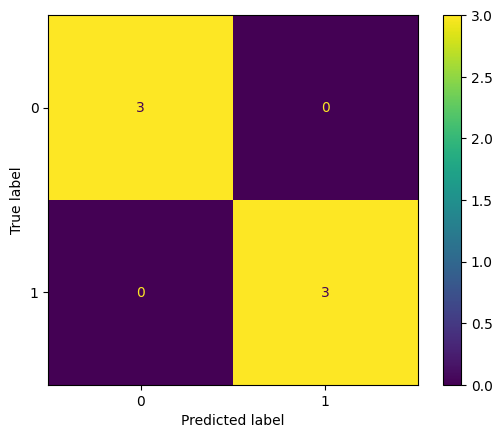

In [84]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, predictions)

In [85]:
print(metrics.classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [86]:
testimages.class_indices

{'Contact lens': 0, 'No contact lens': 1}

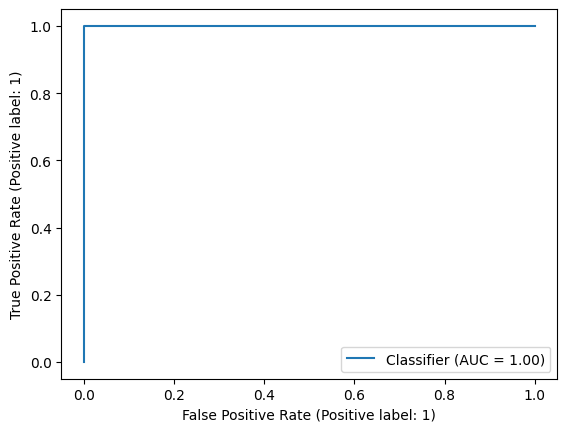

In [87]:
metrics.RocCurveDisplay.from_predictions(y_true, predictions)

In [88]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('binary_classification_cnn_model.h5')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Class A"  # Example class names, modify as per your binary classes
    else:
        return "Class B"

# Example usage:
unknown_image_path = "unknown_image.jpg"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)


OSError: No file or directory found at binary_classification_cnn_model.h5